# DSCI 100: Final Project Title


By: Arshia, James, Lily, and Raina

In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Introduction

provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

clearly state the question you tried to answer with your project

Can player experience level and age predict the number of hours male players spend playing minecraft?

identify and fully describe the dataset that was used to answer the question

# Methods and Results

### Load in data

In [3]:
players_data<-read_csv("https://raw.githubusercontent.com/lilypurdy/toy_ds_project/refs/heads/main/players%20(2).csv")
head(players_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### Wrangle and Clean Data

In [9]:
players <- players_data |> select(-hashedEmail, -subscribe, -name, -gender)
head(players, 5)

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21


### Summarize Data

In [7]:
mean_values <- players |> summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE))

mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


### Visualization

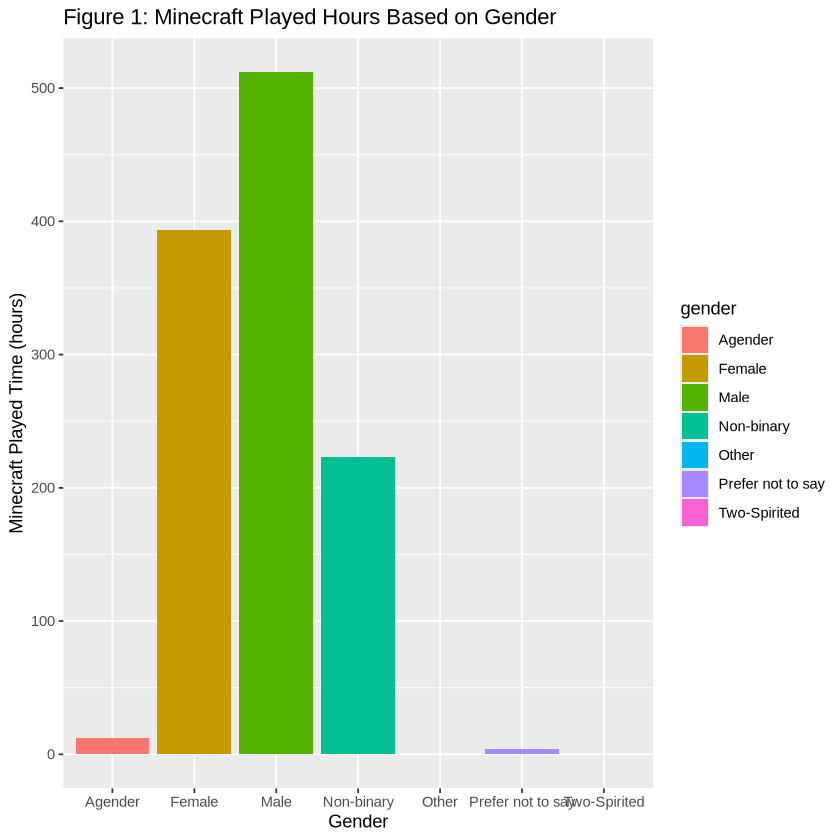

In [14]:
ggplot(players_data, aes(x = gender, y = played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Gender", x = "Gender", y = "Minecraft Played Time (hours)")


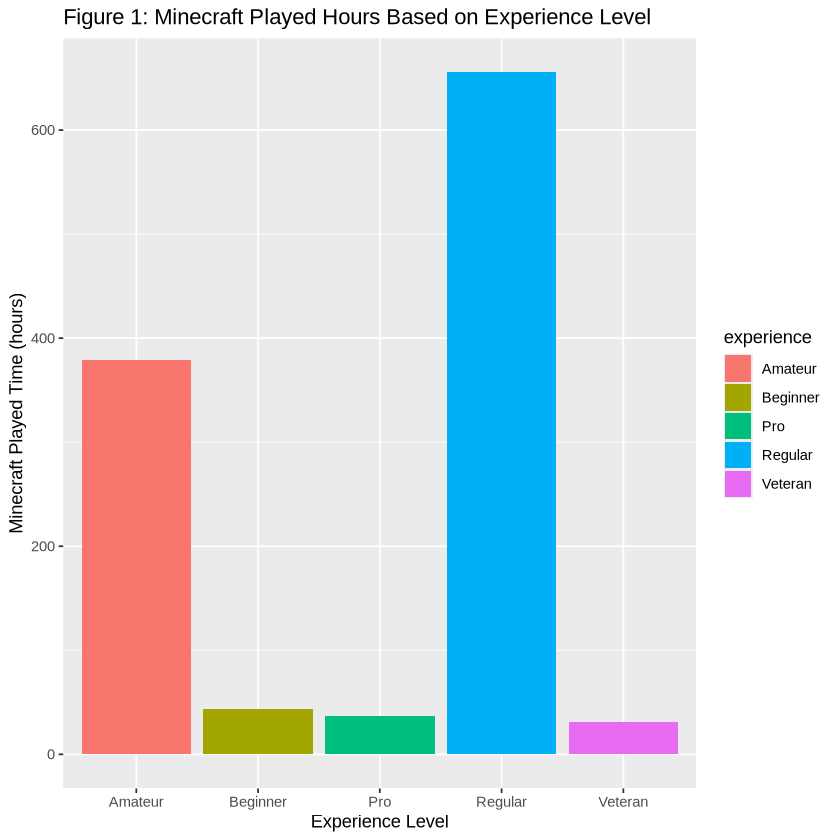

In [15]:
ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Experience Level", x = "Experience Level", y = "Minecraft Played Time (hours)")


Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 87 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


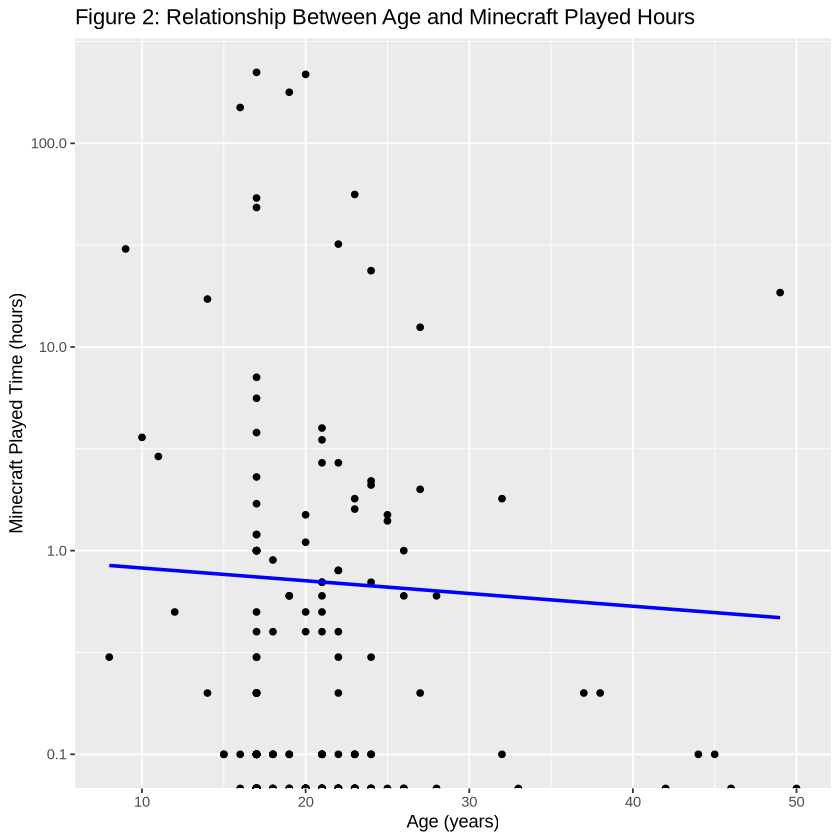

In [15]:
ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(title = "Figure 2: Relationship Between Age and Minecraft Played Hours", x = "Age (years)", y = "Minecraft Played Time (hours)") +
    scale_y_log10(labels = label_comma())


ERROR: Error in df$experience: object of type 'closure' is not subsettable


# Discussion

In [13]:
ss

ERROR: Error in eval(expr, envir, enclos): object 'ss' not found
